# Customer Churn Prediction

This study focuses on a dataset created to predict customer churn probability.

The dataset includes details about customers such as estimated salary, age, gender and more. The primary aim is to provide comprehensive information about the likelihood of a customer churn.

### Contents
1. [Introduction](#introduction)
2. [Data Exploration (EDA - Exploratory Data Analysis)](#eda)
3. [Data Preprocessing](#data-preprocessing)
4. [Machine Learning](#machine-learning)
5. [Model Evaluation](#conclusion)


### Introduction <a id="introduction"></a>

To predict customer churn, we need to gather the dataset to work with. You can obtain the dataset [here](https://www.kaggle.com/datasets/shubh0799/churn-modelling).



In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [31]:
data = pd.read_csv("/content/drive/MyDrive/Churn.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


About data columns:

- **RowNumber:** The number of the row
- **CustomerId:** The unique customer id
- **Surname:** Customers Surname
- **CreditScore:** Their credit score
- **Geography:** Which Country they belong to
- **Gender:** Their Gender
- **Age:** Age
- **Tenure:** The time of bond with company
- **Balance:** The amount left with them
- **NumofProducts:** The products they own.
- **HasCrCard:** Do they have a credit card or not
- **IsActiveMember:** How active member they are
- **EstimatedSalary:** Their estimated salary
- **Exited:** Whether they stay in the or leave

### Data Exploration (EDA - Exploratory Data Analysis) <a id="eda"></a>

- Examine the structure of the dataset (columns, data types, missing values).
- Explore basic statistics (mean, median, standard deviation, etc.).
- Gain more insights about the data by creating data visualizations.


In [32]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Data has not null rows**

In [34]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

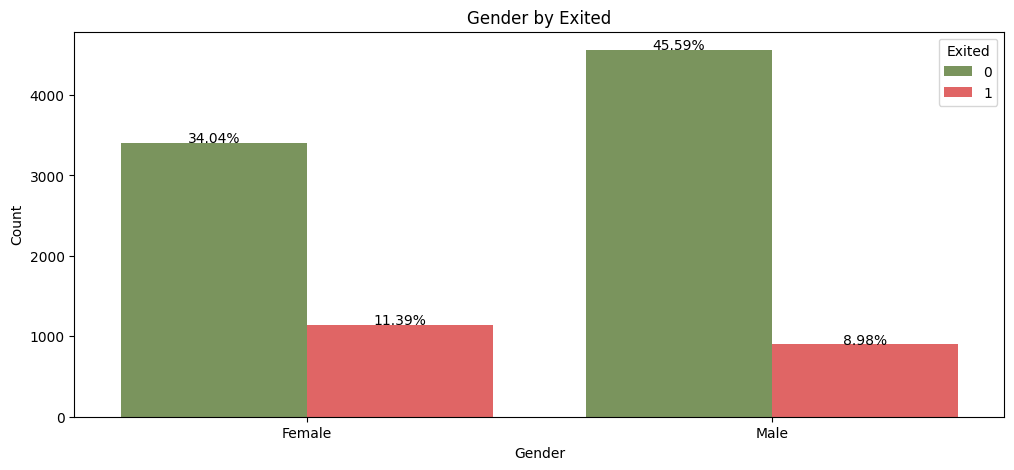

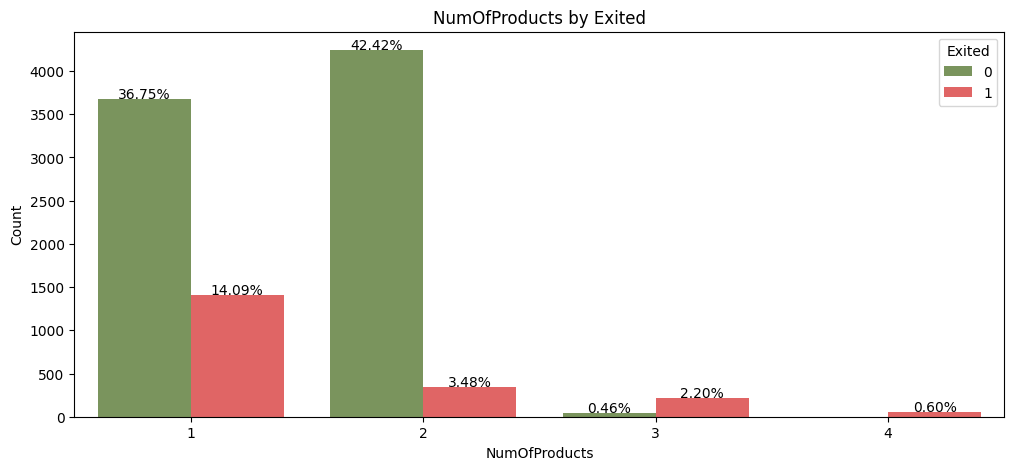

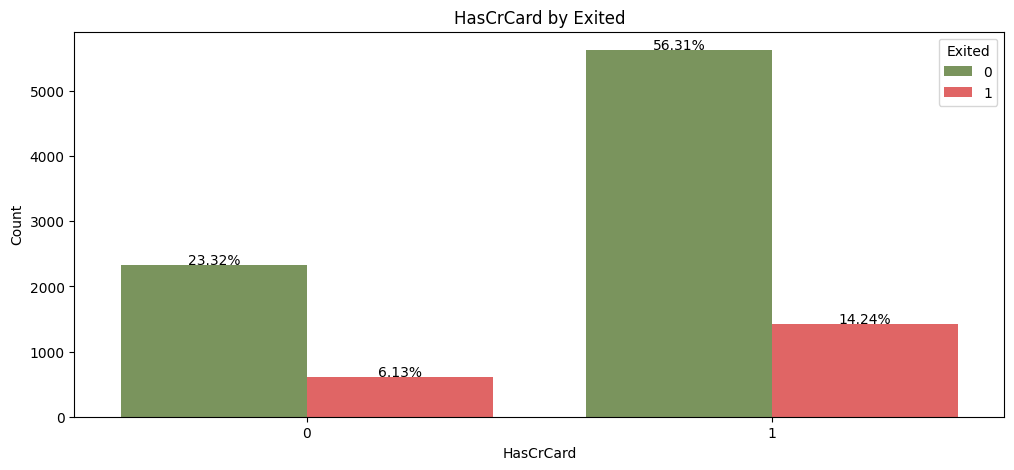

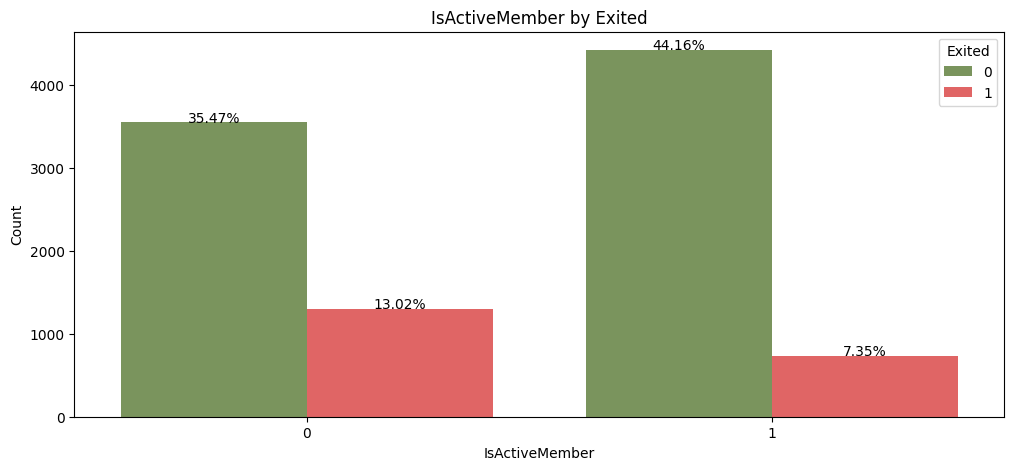

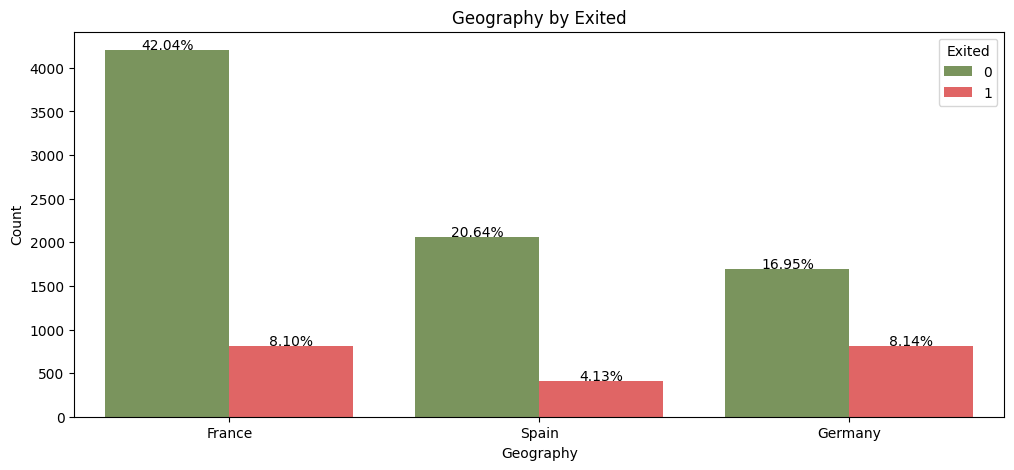

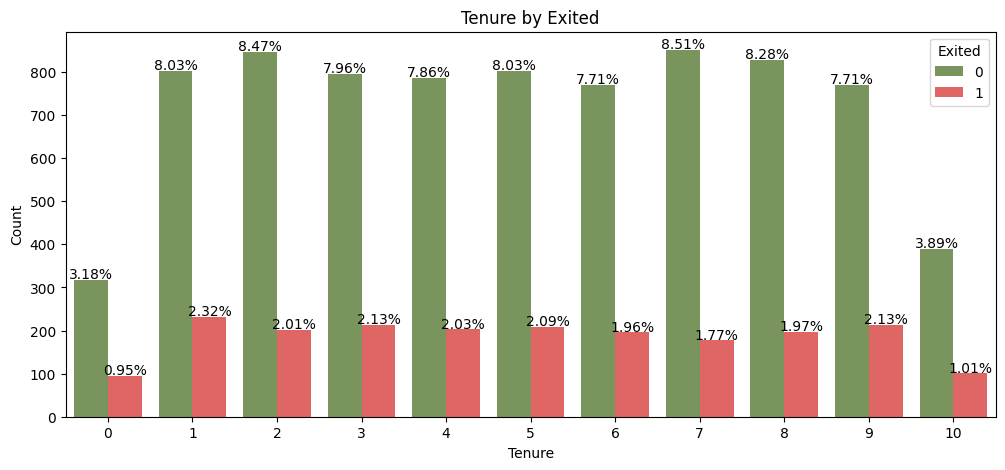

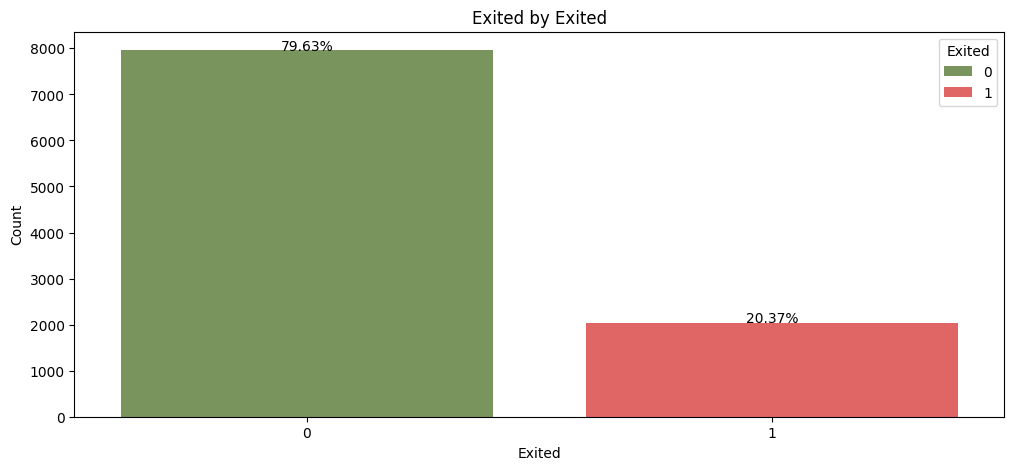

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = data[["Gender","NumOfProducts","HasCrCard","IsActiveMember","Geography","Tenure","Exited"]]
palette_features = ['#7A9D54', '#F55050']

def count_plot(data,hue):
    columns = data.columns
    for column in columns:
        plt.figure(figsize=(12, 5))
        ax = sns.countplot(x=column, hue=hue, data=data,palette=palette_features)
        plt.title(f'{column} by {hue}')
        plt.xlabel(column)
        plt.ylabel("Count")

        total = len(data)
        for p in ax.patches:
            height = p.get_height()
            percent = 100 * height / total
            if percent > 0:
                ax.text(p.get_x() + p.get_width() / 2., height + 3,
                        f'{percent:.2f}%', ha="center")

        plt.show()

count_plot(plot_data,"Exited")


**It is observed that the majority of churned users are female, while the majority of active customers are male.**

**It is evident that active users tend to have a maximum of 3 products, with the majority having 2 products.**

**An observation indicates that a significant portion of both active and churned users hold credit cards.**

**The majority of active customers are from France, while the majority of churned customers are from Germany.**

**The data indicates that 80% of it pertains to active users, while the remaining 20% is associated with churned users.**

<ipython-input-36-0d7a3d7915c0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Exited"], y=column, data=datas, palette = palette_features)


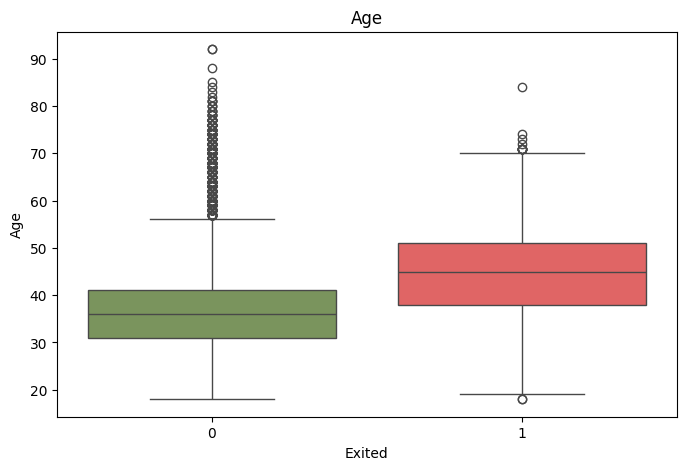

<ipython-input-36-0d7a3d7915c0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Exited"], y=column, data=datas, palette = palette_features)


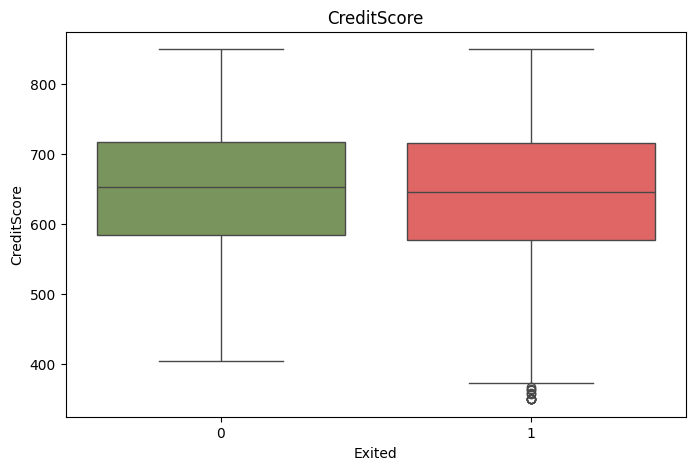

<ipython-input-36-0d7a3d7915c0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Exited"], y=column, data=datas, palette = palette_features)


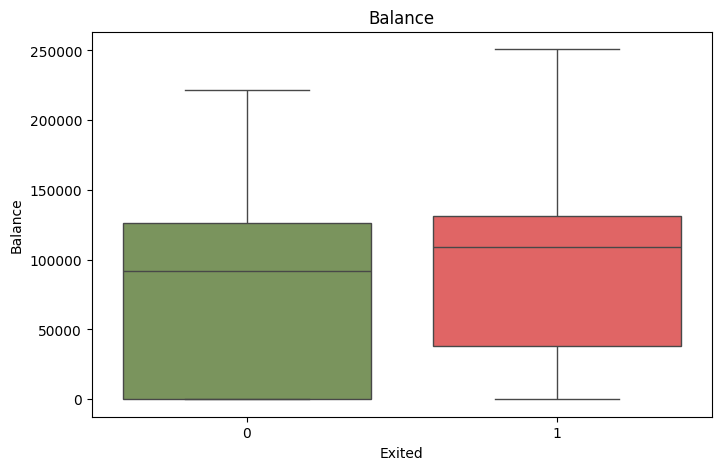

<ipython-input-36-0d7a3d7915c0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Exited"], y=column, data=datas, palette = palette_features)


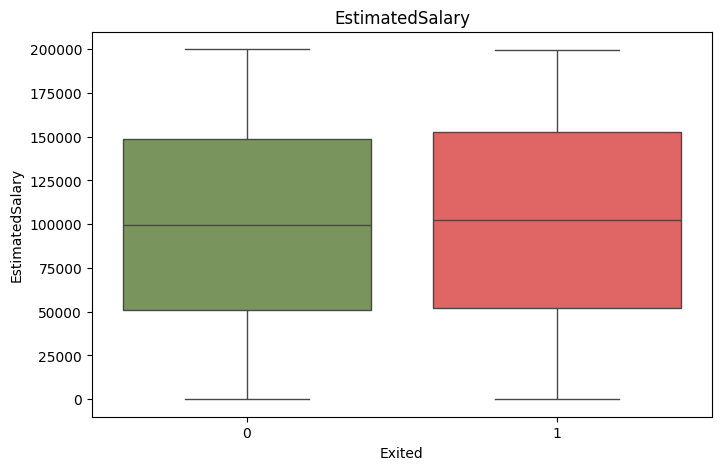

In [36]:
num_data = data[["Age", "CreditScore", "Balance", "EstimatedSalary"]]

def plot_boxplots(datas, columns):
    for column in columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=data["Exited"], y=column, data=datas, palette = palette_features)
        plt.title(f'{column}')
        plt.show()

plot_boxplots(datas=num_data, columns=num_data.columns)

**Age has outliers, we need to remove that later.**

### Data Preprocessing <a id="data-preprocessing"></a>

- Removing Outliers
- Converting categorical variables to numerical data (One-Hot Encoding).
- Removing Unnecessary Columns
- Splitting the data into train and test sets.

### Removing Outliers

In [37]:
outliers = (
    (data["Exited"] == 0) & (data["Age"] > 53) |
    (data["Exited"] == 1) & (data["Age"] > 70)
)

finaldata = data[~outliers]

In [38]:
#check data again
#plot_boxplots(datas=finaldata, columns=num_data.columns)

### Removing Unnecessary Columns

In [39]:
finaldata = finaldata.drop(columns = ['RowNumber','CustomerId','Surname'], axis = 1)

### One Hot Encoding

In [40]:
encoded_data = pd.get_dummies(finaldata, columns = ['Geography','Gender'])
encoded_data[['Geography_France','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male']] = encoded_data[['Geography_France','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male']].astype(int)

### Correlation between Columns

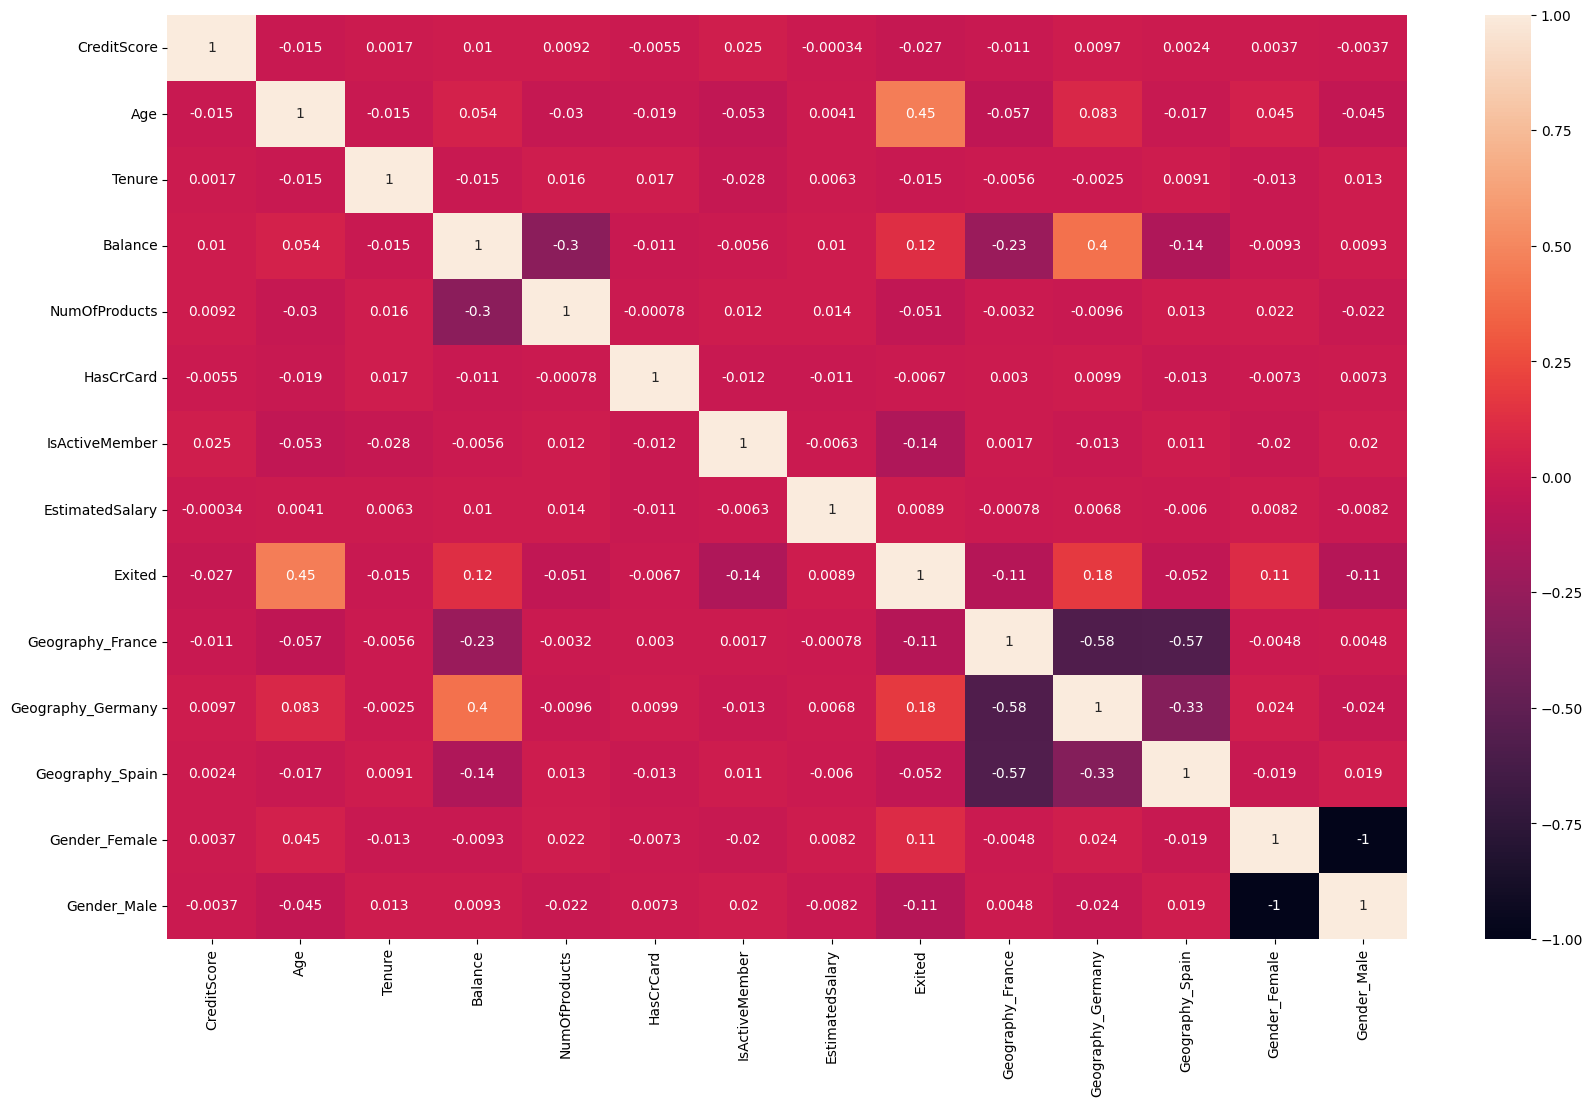

In [41]:
plt.figure(figsize = (20,12))
sns.heatmap(encoded_data.corr(), annot = True)
plt.show()

### Splitting the data into train and test sets.

In [42]:
from sklearn.model_selection import train_test_split

x = encoded_data.drop(['Exited'], axis = 1)
y = encoded_data[["Exited"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Machine Learning <a id="machine-learning"></a>

- Modelling (Logistic Regression, Decision Tree, Random Forest, XGBoost).
- Train the model and fine-tune hyperparameters.
- Evaluate the models' performance on the training data.

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

### Decision Tree Classifier

In [44]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_predict_dtc = dtc.predict(x_test)

dtc_accuracy_1 = accuracy_score(y_test,y_predict_dtc)
dtc_report_1 = classification_report(y_test, y_predict_dtc)

print("Decision Tree Classifier Accuracy: \n\n {} \n\nDecision Tree Classifier Report: \n\n {} ".format(dtc_accuracy_1,dtc_report_1))

Decision Tree Classifier Accuracy: 

 0.8030785562632696 

Decision Tree Classifier Report: 

               precision    recall  f1-score   support

           0       0.89      0.86      0.88      1511
           1       0.50      0.55      0.53       373

    accuracy                           0.80      1884
   macro avg       0.69      0.71      0.70      1884
weighted avg       0.81      0.80      0.81      1884
 


### Decision Tree Classifier with Fine-tuning

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

dtc_model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

grid_search = GridSearchCV(estimator=dtc_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_dtc_model = grid_search.best_estimator_

best_dtc_model.fit(x_train, y_train)

y_predict_dtc = best_dtc_model.predict(x_test)

dtc_accuracy = accuracy_score(y_test, y_predict_dtc)
dtc_report = classification_report(y_test, y_predict_dtc)

print("Best Decision Tree Parameters: \n\n", best_params)
print("Decision Tree Classifier Accuracy: \n\n", dtc_accuracy)
print("Decision Tree Classifier Report: \n\n", dtc_report)


Best Decision Tree Parameters: 

 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Decision Tree Classifier Accuracy: 

 0.8662420382165605
Decision Tree Classifier Report: 

               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1511
           1       0.72      0.54      0.61       373

    accuracy                           0.87      1884
   macro avg       0.80      0.74      0.77      1884
weighted avg       0.86      0.87      0.86      1884




### Model Evaluation <a id="conclusion"></a>

- Examine the ROC curve and AUC value.
- Compare different models.


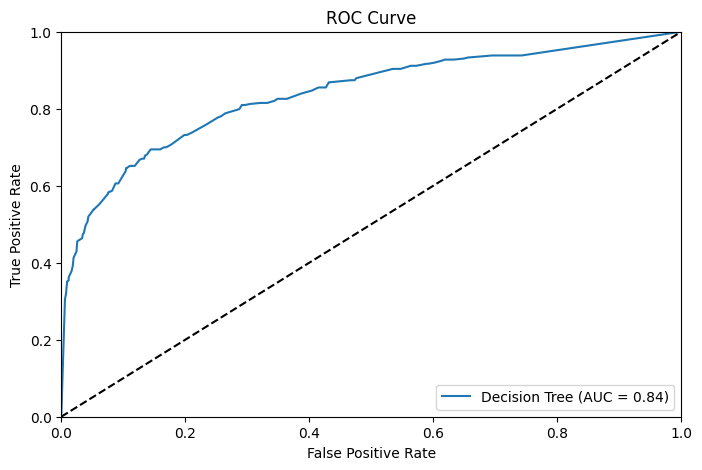

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
# Decision Tree Classifier ROC
dtc_probabilities = best_dtc_model.predict_proba(x_test)[:, 1]
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probabilities)
dtc_auc = roc_auc_score(y_test, dtc_probabilities)

plt.figure(figsize=(8, 5))
plt.plot(dtc_fpr, dtc_tpr, label=f'Decision Tree (AUC = {dtc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
